In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def create_answer(city,num):
    result = []
    for i in range(num):
        # 提取出城市信息
        index_num = [x for x,_ in city]
        # 随机连线 (shuffle城市代码)
        # index_num 数组代表先后顺序
        random.shuffle(index_num)
        result.append(index_num)
    return result

# 染色体交叉并遗传
def Genetic_crossover(old_answer,city):
    Fitvalue=Fitness_value(old_answer,city)
    Fitvalue=[item/sum(Fitvalue) for item in Fitvalue]
    # 累加
    for i in range(len(Fitvalue)-1):
        Fitvalue[i+1]+=Fitvalue[i]
    # 保存父母队
    result=[]
    for pairs in range(len(old_answer)//2):
        # 轮盘选择法选择父母队
        tmp=[]
        for i in range(2):
            possible=random.uniform(0,1)
            for j in range(len(Fitvalue)-1):
                if Fitvalue[j]>possible and j==0:
                    tmp.append(old_answer[j])
                if possible>Fitvalue[j] and possible<Fitvalue[j+1]:
                    tmp.append(old_answer[j+1])
        # 交叉 (此处不能相应位置交叉--->每一个都是路径解，相应位置交叉会导致重复城市出现),此问题可不设置交叉
        result.append(tmp[0])
        result.append(tmp[1])
    return result


# 根据索引查找城市坐标，并且计算适应度函数
def Fitness_value(old_answer,city):
    # 将city存储模式转化为dict,方便为后续索引查找提供前题
    dict_city = dict(city)
    # 存储各个回答的距离
    fitness_value = []
    for i in range(len(old_answer)):
        tmp_answer = old_answer[i]
        tmp_distance = 0
        # 计算距离
        for j in range(len(old_answer[0])-1):
            city1_index = old_answer[i][j]
            city2_index = old_answer[i][j+1]
            city1 = np.array(dict_city[city1_index])
            city2 = np.array(dict_city[city2_index])
            deta=city2-city1
            tmp_distance+=np.linalg.norm(deta)
        fitness_value.append(1/tmp_distance)
    return fitness_value

#变异
def variation(old_answer,threshold):
    #循环每条染色体
    for i in range(len(old_answer)):
        rand=random.uniform(0,1)
        if rand < threshold:
            # 随机变异位置(任两个位置交换)
            choice_value = random.sample(old_answer[i],2)
            random_place1 = old_answer[i].index(choice_value[0])
            random_place2 = old_answer[i].index(choice_value[1])
            tmp = old_answer[i][random_place1]
            old_answer[i][random_place1] = old_answer[i][random_place2]
            old_answer[i][random_place2] = tmp
    return old_answer

# 可视化最优解的路径图
def visualization(Best,city):
    dict_city=dict(city)
    # 打印出最优路径
    Walking_path="->".join(Best[0])
    print("Walking(travel) Path:",Walking_path)
    print("\nTravel distance:",1/Best[1])
    # 可视化图
    ax=plt.axes()
    x=[]
    y=[]
    dx_all=[]
    dy_all=[]
    for i in range(len(Best[0])-1):
        x1 = dict_city[Best[0][i]][0]
        y1 = dict_city[Best[0][i]][1]
        x2 = dict_city[Best[0][i+1]][0]
        y2 = dict_city[Best[0][i+1]][1]
        dx = x2 - x1
        dy = y2 -y1
        x.append(x1)
        y.append(y1)
        dx_all.append(dx)
        dy_all.append(dy)
    plt.plot(x,y,"o")
    c = np.random.randn(len(x))  
    plt.quiver(x,y,dx_all,dy_all,c,angles='xy',scale_units='xy',scale=1)
    plt.show()
        


Walking(travel) Path: 12->19->28->8->3->33->27->5->2->11->14->34->43->37->29->10->44->23->15->7->9->47->6->18->40->46->20->16->41->22->24->39->1->13->42->35->4->21->32->38->36->17->30->31->45->26->25

Travel distance: 115751.79361901263


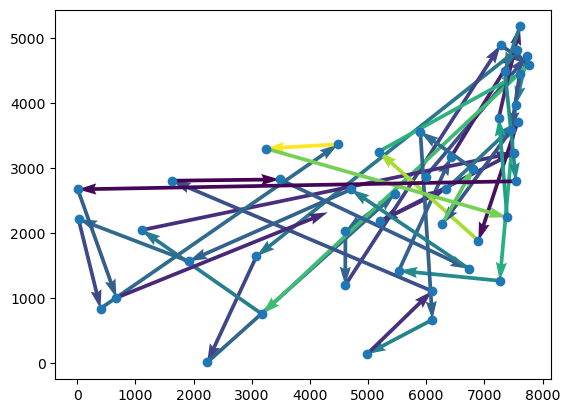

总用时: 52.18870568275452


In [2]:
T1=time.time()

df=pd.read_csv('att48.tsp',sep=" ",skiprows=6,header=None)

city = np.array(df[0][0:len(df)-2])
#city name
city_name=city.tolist()
city_x=np.array(df[1][0:len(df)-2])
city_y=np.array(df[2][0:len(df)-2])
# get city location
city_location = list(zip(city_x,city_y))
city = list(zip(city_name,city_location))
"""
city ---[(name,(x,y)),……，(……)]
dict(city) ---{'name':(x,y),……}
"""

numbers = 100
epoch = 1000
variation_threshold=0.1

middle_set = create_answer(city,numbers) # 随机产生numbers个答案
Elite=[] # 保存各代最优解
for i in range(epoch):
    middle_set = Genetic_crossover(middle_set,city) #染色体交叉并遗传
    middle_set = variation(middle_set,variation_threshold) #变异
    # 选出每一轮中最优的
    Fitvalue=Fitness_value(middle_set,city)
    index=Fitvalue.index(max(Fitvalue))
    # 各代最优解保存Elite中,形式:[answer,Fitvalue]
    Elite.append([middle_set[index],Fitvalue[index]])

# 各代精英排序(最大——>最小)
Elite.sort(key=lambda x:x[1],reverse=True)
Best=Elite[0]
visualization(Best,city)

T2=time.time()
print("总用时:",T2-T1)